# Analisis Megaline

- [¿Cuál es un mejor plan?](#cuál-es-un-mejor-plan)
- [Introducción](#introducción)
- [Inicialización](#inicialización)
- [Cargar los datos](#cargar-los-datos)
- [Preparar los datos](#preparar-los-datos)
- [Planes](#planes)
- [Usuarios](#usuarios)
  - [Corregir datos](#corregir-datos)
- [Llamadas](#llamadas)
  - [Corregir datos](#corregir-datos)
  - [Enriquecer datos](#enriquecer-datos)
- [Mensajes](#mensajes)
  - [Corregir datos](#corregir-datos)
- [Internet](#internet)
  - [Corregir datos](#corregir-datos)
- [Estudiar las condiciones del plan](#estudiar-las-condiciones-del-plan)
- [Agregar datos por usuario](#agregar-datos-por-usuario)
- [Estudia el comportamiento del usuario](#estudia-el-comportamiento-del-usuario)
  - [Llamadas](#llamadas)
  - [Mensajes](#mensajes)
  - [Internet](#internet)
- [Ingreso](#ingreso)
- [Probar las hipótesis estadísticas](#probar-las-hipótesis-estadísticas)
- [Conclusión general](#conclusión-general)


# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Introducción

La elaboracion del siguiente proyecto tiene como fin determinar cual de los planes que se ofrecen al cliente "Surf" y "Ultimate" puede generar mas ingresos y con ello ajustar lo presupuestos de la publicidad

Se realizará un analisis de las tarifas con una muestra de 500 clientes y los datos recaudados durante 2018 corrigiendo errores y requisitos de la empresa Megaline

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd

import numpy as np

import math

import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

## Cargar los datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Planes

Exploracion de las tablas para comprender los datos

In [3]:
# Imprime la información general/resumen sobre el DataFrame de los planes
print(df_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para los planes
print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [5]:
#ademas voy a buscar vallores aussertes
print(df_plans.isna().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


Anteriormente pudimos ver los datos que incluyen las tablas y se puede apreciar que
Las gigas incluidas por plan no coinciden con la descripcion inical, habra que corregirlo
Todo lo demas parece estar en orden
No hay datos ausentes

In [6]:
# GB para planes
df_plans['gigas_per_month_included'] = df_plans['mb_per_month_included'] / 1024

print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gigas_per_month_included  
0                      15.0  
1                      30.0  


Cree una nueva columna de gb para posteriormente tener un mejor manejo y evitar contratiempos o confusiones

## Usuarios

In [7]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
# Imprime una muestra de los datos para los usuarios
print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


In [9]:
#ver vlores ausentes
print(df_users.isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


Podemos ver que tenemos datos de 500 clientes
Ningun valor ausente
El tipo de datos coincide con el requerido
Y podemos ver que hay una columna llamda churn_date, la cual se refiere a la fecha en que el cliente canceló su plan, en la cual solo tenemos 34 respuestas, los demas no estan asignados, esto pudiera significar que de 500 clientes, 34 cancelaron su plan y los otros 466 sigun activos

### Corregir datos

In [10]:
#reg_date a formato fecha
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


Corregimos el formato de fecha

## Llamadas

In [11]:
# Imprime la información/resumen general sobre el DataFrame de las llamadas
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [12]:
# Imprime una muestra de datos para llamadas
print(df_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [13]:
#valores ausentes
print(df_calls.isna().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


Vemos el historial de llamadas, no hay valores ausentes pero vamos a buscar posibles valores que nos den problemas como las llamadas anormalmente cortas

### Corregir datos

In [14]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


In [15]:
lose_calls = df_calls.query('duration == 0')

print(lose_calls)

              id  user_id  call_date  duration
19        1001_4     1001 2018-12-05       0.0
25       1001_13     1001 2018-12-24       0.0
31       1001_30     1001 2018-10-17       0.0
32       1001_31     1001 2018-11-03       0.0
34       1001_35     1001 2018-12-21       0.0
...          ...      ...        ...       ...
137714  1499_183     1499 2018-11-10       0.0
137715  1499_184     1499 2018-09-15       0.0
137720  1499_189     1499 2018-12-27       0.0
137722  1499_191     1499 2018-12-24       0.0
137725  1499_194     1499 2018-10-31       0.0

[26834 rows x 4 columns]


### Enriquecer datos

todas esas llamadas perdidas las vamos a agregar a una nueva columna

In [16]:
df_calls = df_calls.assign(lose_calls=lose_calls['duration'] == 0)
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          137735 non-null  object        
 1   user_id     137735 non-null  int64         
 2   call_date   137735 non-null  datetime64[ns]
 3   duration    137735 non-null  float64       
 4   lose_calls  26834 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.3+ MB
None


In [17]:
df_calls = df_calls.replace(0, np.nan)
print(df_calls.isna().sum())

id                 0
user_id            0
call_date          0
duration       26834
lose_calls    110901
dtype: int64


Ahora podemos ver que los valores ausentes en duration en realidad se movieron a lose_calls y viceversa para tener mejor control

In [18]:
df_calls["duration"] = np.ceil(df_calls["duration"])
print(df_calls.head())

         id  user_id  call_date  duration lose_calls
0   1000_93     1000 2018-12-27       9.0        NaN
1  1000_145     1000 2018-12-27      14.0        NaN
2  1000_247     1000 2018-12-27      15.0        NaN
3  1000_309     1000 2018-12-28       6.0        NaN
4  1000_380     1000 2018-12-30       5.0        NaN


Redondeamos las llamadas

## Mensajes

In [19]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
print(df_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [20]:
# Imprime una muestra de datos para los mensajes
print(df_messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


In [21]:
#ver vlores ausentes
print(df_messages.isna().sum())

id              0
user_id         0
message_date    0
dtype: int64


No tenemos valores ausentes, los tipos de datos son correctos

### Corregir datos

In [22]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


Corregimos el tipo de datos

## Internet

In [23]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [24]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


In [25]:
#ver vlores ausentes
print(df_internet.isna().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


Podemos ver que tenemos los datos de uso de internet, no hay datos ausentes y el tipo de datos es correcto

### Corregir datos

In [26]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


cambiamos el tipo de datos

## Estudiar las condiciones del plan

[Es sumamente importante entender cómo funcionan los planes, cómo se cobra a los usuarios con base en su plan de suscripción. Así que te sugerimos imprimir la información del plan para ver una vez más sus condiciones.]

In [27]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros
print(df_plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   messages_included         2 non-null      int64  
 1   mb_per_month_included     2 non-null      int64  
 2   minutes_included          2 non-null      int64  
 3   usd_monthly_pay           2 non-null      int64  
 4   usd_per_gb                2 non-null      int64  
 5   usd_per_message           2 non-null      float64
 6   usd_per_minute            2 non-null      float64
 7   plan_name                 2 non-null      object 
 8   gigas_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes
None


In [28]:
print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gigas_per_month_included  
0                      15.0  
1                      30.0  


## Agregar datos por usuario


In [29]:
# Calcula el número de llamadas hechas por cada usuario por mes. Guarda el resultado.
calls_per_user = df_calls.groupby(['user_id', df_calls['call_date'].dt.month]).agg(calls=('duration', 'size')).reset_index()
calls_per_user.rename(columns={'call_date': 'month'}, inplace=True)

print(calls_per_user.head())

   user_id  month  calls
0     1000     12     16
1     1001      8     27
2     1001      9     49
3     1001     10     65
4     1001     11     64


In [30]:
# Calcula la cantidad de minutos que usó cada usuario por mes. Guarda el resultado.
minutes_per_user = df_calls.groupby(['user_id', df_calls['call_date'].dt.month]).agg(num_minutes=('duration', 'sum')).reset_index()
minutes_per_user.rename(columns={'call_date': 'month'}, inplace=True)

print(minutes_per_user.head())

   user_id  month  num_minutes
0     1000     12        124.0
1     1001      8        182.0
2     1001      9        315.0
3     1001     10        393.0
4     1001     11        426.0


In [31]:
# Calcula el número de mensajes enviados por cada usuario por mes
messages_per_month = df_messages.groupby(['user_id', df_messages['message_date'].dt.month]).agg(num_messages=('message_date', 'size')).reset_index()
messages_per_month.rename(columns={'message_date': 'month'}, inplace=True)

print(messages_per_month.head())

   user_id  month  num_messages
0     1000     12            11
1     1001      8            30
2     1001      9            44
3     1001     10            53
4     1001     11            36


In [32]:
# Calcula el volumen del tráfico de internet usado por cada usuario por mes
megas_per_month = df_internet.groupby(['user_id', df_internet['session_date'].dt.month]).agg(num_megas=('mb_used', 'sum')).reset_index()
megas_per_month.rename(columns={'session_date': 'month'}, inplace=True)

# GB
megas_per_month['num_gigas'] = megas_per_month['num_megas'] / 1024

# Redondeo fe GB
megas_per_month['num_gigas'] = np.ceil(megas_per_month['num_gigas'])
print(megas_per_month.head())

   user_id  month  num_megas  num_gigas
0     1000     12    1901.47        2.0
1     1001      8    6919.15        7.0
2     1001      9   13314.82       14.0
3     1001     10   22330.49       22.0
4     1001     11   18504.30       19.0


In [33]:
print(calls_per_user.head())
print(minutes_per_user.head())
print(messages_per_month.head())
print(megas_per_month.head())

   user_id  month  calls
0     1000     12     16
1     1001      8     27
2     1001      9     49
3     1001     10     65
4     1001     11     64
   user_id  month  num_minutes
0     1000     12        124.0
1     1001      8        182.0
2     1001      9        315.0
3     1001     10        393.0
4     1001     11        426.0
   user_id  month  num_messages
0     1000     12            11
1     1001      8            30
2     1001      9            44
3     1001     10            53
4     1001     11            36
   user_id  month  num_megas  num_gigas
0     1000     12    1901.47        2.0
1     1001      8    6919.15        7.0
2     1001      9   13314.82       14.0
3     1001     10   22330.49       22.0
4     1001     11   18504.30       19.0


In [34]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes
combined_info = calls_per_user.merge(minutes_per_user, on=['user_id', 'month'], how='outer').merge(messages_per_month, on=['user_id', 'month'], how='outer').merge(megas_per_month, on=['user_id', 'month'], how='outer')

print(combined_info.head())

   user_id  month  calls  num_minutes  num_messages  num_megas  num_gigas
0     1000     12   16.0        124.0          11.0    1901.47        2.0
1     1001      8   27.0        182.0          30.0    6919.15        7.0
2     1001      9   49.0        315.0          44.0   13314.82       14.0
3     1001     10   65.0        393.0          53.0   22330.49       22.0
4     1001     11   64.0        426.0          36.0   18504.30       19.0


In [35]:
df_plans.rename(columns={'plan_name': 'plan'}, inplace=True)
print(df_plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute      plan  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gigas_per_month_included  
0                      15.0  
1                      30.0  


In [36]:

print(combined_info.head())

   user_id  month  calls  num_minutes  num_messages  num_megas  num_gigas
0     1000     12   16.0        124.0          11.0    1901.47        2.0
1     1001      8   27.0        182.0          30.0    6919.15        7.0
2     1001      9   49.0        315.0          44.0   13314.82       14.0
3     1001     10   65.0        393.0          53.0   22330.49       22.0
4     1001     11   64.0        426.0          36.0   18504.30       19.0


In [37]:

print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate        NaT  
1 2018-08-13      surf        NaT  
2 2018-10-21      surf        NaT  
3 2018-01-28      surf        NaT  
4 2018-05-23      surf        NaT  


In [38]:
# Añade la información del plan

combined_info = combined_info.merge(df_users, on=['user_id']).merge(df_plans, on=['plan'])
print(combined_info.head())


   user_id  month  calls  num_minutes  num_messages  num_megas  num_gigas  \
0     1000     12   16.0        124.0          11.0    1901.47        2.0   
1     1006     11    2.0         10.0          15.0    2068.37        3.0   
2     1006     12    9.0         59.0         139.0   32118.82       32.0   
3     1008     10   71.0        476.0          21.0   17106.99       17.0   
4     1008     11   63.0        446.0          37.0   23676.72       24.0   

  first_name last_name  age  ...      plan churn_date messages_included  \
0   Anamaria     Bauer   45  ...  ultimate        NaT              1000   
1     Jesusa  Bradford   73  ...  ultimate 2018-12-18              1000   
2     Jesusa  Bradford   73  ...  ultimate 2018-12-18              1000   
3      Emely   Hoffman   53  ...  ultimate        NaT              1000   
4      Emely   Hoffman   53  ...  ultimate        NaT              1000   

  mb_per_month_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0           

Establecemos los ingresos mensuales de cada usuariode acuerdo a las condiciones de plan y el uso de este

In [39]:
print(combined_info.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   user_id                   2293 non-null   int64         
 1   month                     2293 non-null   int64         
 2   calls                     2258 non-null   float64       
 3   num_minutes               2258 non-null   float64       
 4   num_messages              1806 non-null   float64       
 5   num_megas                 2277 non-null   float64       
 6   num_gigas                 2277 non-null   float64       
 7   first_name                2293 non-null   object        
 8   last_name                 2293 non-null   object        
 9   age                       2293 non-null   int64         
 10  city                      2293 non-null   object        
 11  reg_date                  2293 non-null   datetime64[ns]
 12  plan                

In [40]:
# Calcula el ingreso mensual para cada usuario

combined_info['monthly_income'] = (combined_info['num_minutes'] - combined_info['minutes_included'])*combined_info['usd_per_minute']
combined_info['monthly_income'] = (combined_info['num_messages'] - combined_info['messages_included'])*combined_info['usd_per_message']
combined_info['monthly_income'] = (combined_info['num_gigas'] - combined_info['gigas_per_month_included'])*combined_info['usd_per_gb']

combined_info.loc[combined_info['monthly_income'] < 0, 'monthly_income'] = 0


In [41]:
combined_info['monthly_total']=combined_info['monthly_income']+combined_info['usd_monthly_pay']

In [42]:
print(combined_info.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   user_id                   2293 non-null   int64         
 1   month                     2293 non-null   int64         
 2   calls                     2258 non-null   float64       
 3   num_minutes               2258 non-null   float64       
 4   num_messages              1806 non-null   float64       
 5   num_megas                 2277 non-null   float64       
 6   num_gigas                 2277 non-null   float64       
 7   first_name                2293 non-null   object        
 8   last_name                 2293 non-null   object        
 9   age                       2293 non-null   int64         
 10  city                      2293 non-null   object        
 11  reg_date                  2293 non-null   datetime64[ns]
 12  plan                

## Estudia el comportamiento del usuario

Estudio de la duracion promedio de las llamadas por usuario y por plan

### Llamadas

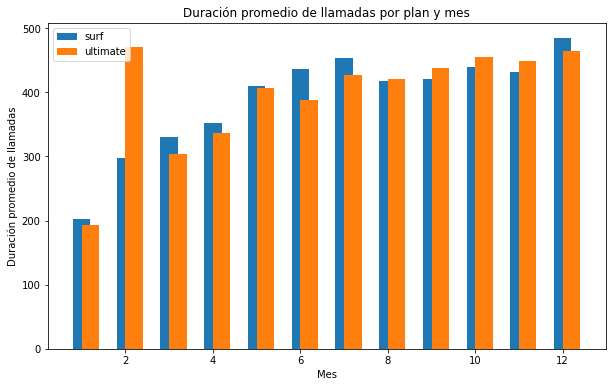

In [43]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.
avg_call = combined_info.groupby(['plan', 'month'])['num_minutes'].mean().reset_index()

# Div de los planes
surf_data = avg_call[avg_call['plan'] == 'surf']
ultimate_data = avg_call[avg_call['plan'] == 'ultimate']

#Grafic
plt.figure(figsize=(10, 6))
plt.bar(surf_data['month'], surf_data['num_minutes'], width=0.4, align='center', label='surf')
plt.bar(ultimate_data['month'], ultimate_data['num_minutes'], width=0.4, align='edge', label='ultimate')
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas')
plt.title('Duración promedio de llamadas por plan y mes')
plt.legend()
plt.show()

La duracion promedio de ambos planes son bastante similares, solo tenemos un incremento grande para usuarios ultimate en el mes 2

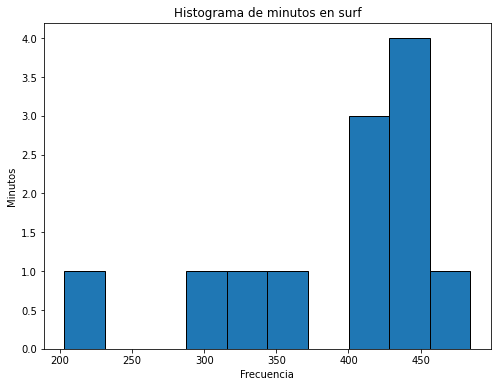

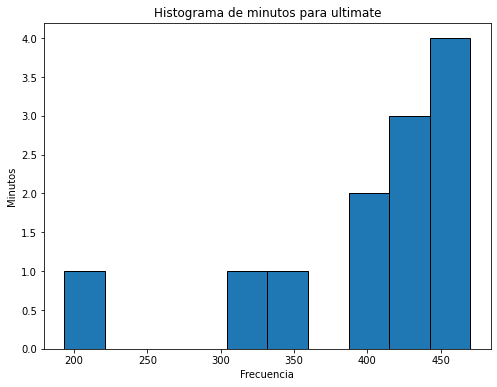

In [44]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.
# Hist durf
plt.figure(figsize=(8, 6))
plt.hist(surf_data['num_minutes'], bins=10, edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Minutos')
plt.title('Histograma de minutos en surf')
plt.show()

# Hist ult
plt.figure(figsize=(8, 6))
plt.hist(ultimate_data['num_minutes'], bins=10, edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Minutos')
plt.title('Histograma de minutos para ultimate')
plt.show()

Los resultados son bastante similares pero los resultados de los usuarios ultimate respecto a los minutos son ligeramente mas grandes

Calculamos la media y la variable de la duración de la llamada para concluir si los usuarios de diferentes planes muestran comportamientos distintos para sus llamadas

In [45]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media = combined_info.groupby(['plan', 'month'])['num_minutes'].mean()
varianza = combined_info.groupby(['plan', 'month'])['num_minutes'].var()

print("Media:", media)
print("Varianza:", varianza)

Media: plan      month
surf      1        203.000000
          2        297.000000
          3        330.000000
          4        351.540000
          5        410.240000
          6        435.791667
          7        453.733333
          8        417.849057
          9        420.732984
          10       438.991379
          11       432.494585
          12       484.501608
ultimate  1        193.500000
          2        470.333333
          3        304.250000
          4        336.857143
          5        406.241379
          6        387.444444
          7        427.067797
          8        421.436620
          9        437.511628
          10       455.028571
          11       448.730159
          12       465.261745
Name: num_minutes, dtype: float64
Varianza: plan      month
surf      1        15842.000000
          2        52226.500000
          3        35809.363636
          4        50866.743265
          5        56938.779459
          6        44094.061404
     

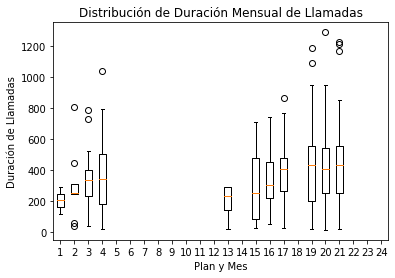

In [46]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
datos = combined_info.groupby(['plan', 'month'])['num_minutes'].apply(list).values

plt.boxplot(datos)

plt.xlabel('Plan y Mes')
plt.ylabel('Duración de Llamadas')
plt.title('Distribución de Duración Mensual de Llamadas')

plt.show()

¿Este comportamiento es diferente entre los planes?
Los usuarios ultimate tienen mucho mas actividad (tanto en la frecuencia de llamadas como en la duracion de estas) a excepcion de los ultimos 3 meses

### Mensajes

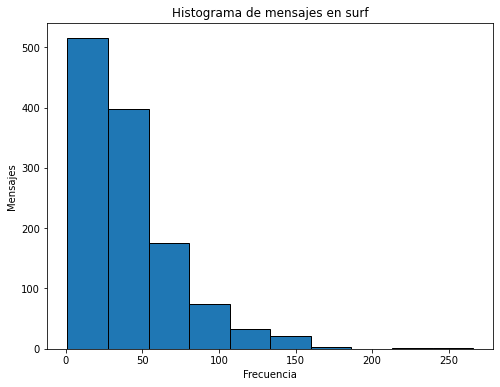

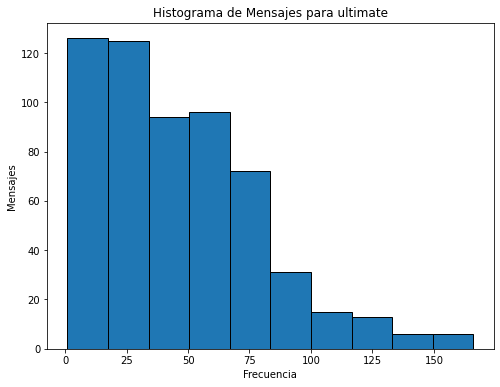

In [47]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
surf_monthly_messages = combined_info[combined_info['plan'] == 'surf']
ultimate_monthly_messages = combined_info[combined_info['plan'] == 'ultimate']

# Hist durf
plt.figure(figsize=(8, 6))
plt.hist(surf_monthly_messages['num_messages'], bins=10, edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Mensajes')
plt.title('Histograma de mensajes en surf')
plt.show()

# Hist ult
plt.figure(figsize=(8, 6))
plt.hist(ultimate_monthly_messages['num_messages'], bins=10, edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Mensajes')
plt.title('Histograma de Mensajes para ultimate')
plt.show()

¿Este comportamiento es diferente entre los planes? Si, los usuarios surf envian mas del triple de mensajes que los usuarios Ultimate

### Internet

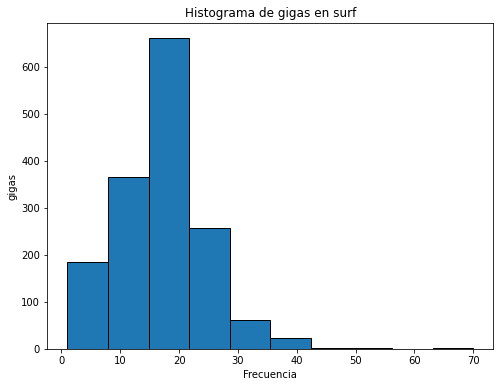

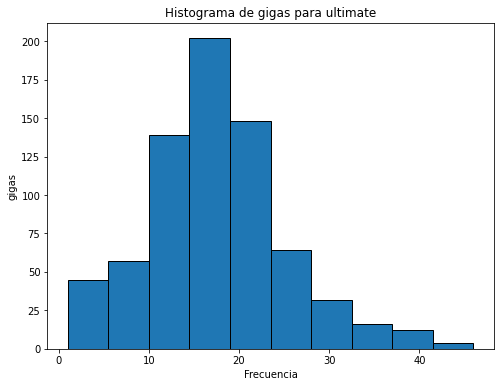

In [48]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
surf_monthly = combined_info[combined_info['plan'] == 'surf']
ultimate_monthly = combined_info[combined_info['plan'] == 'ultimate']

# Hist durf
plt.figure(figsize=(8, 6))
plt.hist(surf_monthly['num_gigas'], bins=10, edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('gigas')
plt.title('Histograma de gigas en surf')
plt.show()

# Hist ult
plt.figure(figsize=(8, 6))
plt.hist(ultimate_monthly['num_gigas'], bins=10, edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('gigas')
plt.title('Histograma de gigas para ultimate')
plt.show()

¿Este comportamiento es diferente entre los planes? Si, los usuarios Surf consumen mas gigas de su paquete, mientras que los Ultimate si bien consumen mas gb, porcentualmente y en relacion a su paquete no consumen tantas como los usuarios Surf

## Ingreso

[Del mismo modo en que has estudiado el comportamiento del usuario, es decir, estadísticamente, describe el ingreso entre los planes.]

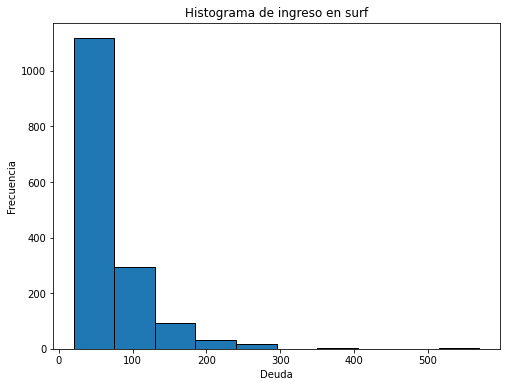

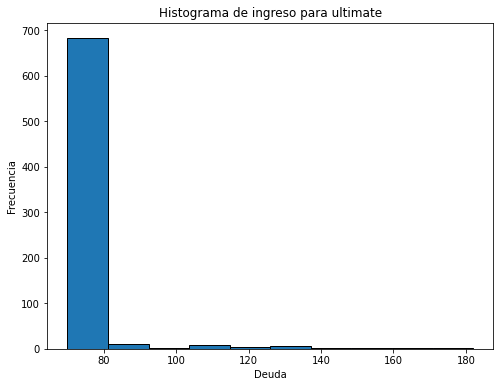

In [49]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan

surf_monthly = combined_info[combined_info['plan'] == 'surf']
ultimate_monthly = combined_info[combined_info['plan'] == 'ultimate']

# Hist durf
plt.figure(figsize=(8, 6))
plt.hist(surf_monthly['monthly_total'], bins=10, edgecolor='black')
plt.xlabel('Deuda')
plt.ylabel('Frecuencia')
plt.title('Histograma de ingreso en surf')
plt.show()

# Hist ult
plt.figure(figsize=(8, 6))
plt.hist(ultimate_monthly['monthly_total'], bins=10, edgecolor='black')
plt.xlabel('Deuda')
plt.ylabel('Frecuencia')
plt.title('Histograma de ingreso para ultimate')
plt.show()

En cuanto al trafico consumido por los planes Surf y Ultimate, los usuarios Surf suelen quedarse cortos de GB utilizando gb extras y generando mucho mas ingreso por cargos extras

## Probar las hipótesis estadísticas.

In [51]:
ingresos_ultimate = combined_info[combined_info['plan'] == 'ultimate']['monthly_total'].values
ingresos_surf = combined_info[combined_info['plan'] == 'surf']['monthly_total'].values

statistic, pvalue = ttest_ind(ingresos_ultimate, ingresos_surf, nan_policy='omit')

print("Estadística de prueba:", statistic)
print("Valor p:", pvalue)

alpha = 0.05
if pvalue < alpha:
    print("Se rechaza la hipótesis nula. Existe una diferencia significativa en los ingresos promedio.")
else:
    print("No se puede rechazar la hipótesis nula. No se encuentra evidencia suficiente de una diferencia significativa en los ingresos promedio.")

Estadística de prueba: 6.464382544616247
Valor p: 1.2405746384721852e-10
Se rechaza la hipótesis nula. Existe una diferencia significativa en los ingresos promedio.


Vemos ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [ ]:
combined_info['city'].value_counts()

In [52]:
ingresos_nynj = combined_info[combined_info['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_total'].values
ingresos_otras_regiones = combined_info[combined_info['city'] != 'NY-NJ']['monthly_total'].values

ingresos_nynj = np.nan_to_num(ingresos_nynj)
ingresos_otras_regiones = np.nan_to_num(ingresos_otras_regiones) 

statistic, pvalue = ttest_ind(ingresos_nynj, ingresos_otras_regiones, nan_policy='omit')

print("Estadística de prueba:", statistic)
print("Valor p:", pvalue)

alpha = 0.05
if pvalue < alpha:
    print("Se rechaza la hipótesis nula. Existe una diferencia significativa en el ingreso promedio entre el área NY-NJ y otras regiones.")
else:
    print("No se puede rechazar la hipótesis nula. No se encuentra evidencia suficiente de una diferencia significativa en el ingreso promedio entre el área NY-NJ y otras regiones.")

Estadística de prueba: -1.7590792471908607
Valor p: 0.07867866375353852
No se puede rechazar la hipótesis nula. No se encuentra evidencia suficiente de una diferencia significativa en el ingreso promedio entre el área NY-NJ y otras regiones.


## Conclusión general


En conclusion, al comparar los planes de comunicación Surf y Ultimate de Megaline, podemps observar que los usuarios Ultimate tienen una mayor actividad en términos de frecuencia y duración de las llamadas, mientras que los usuarios Surf por enviar más mensajes. 

En cuanto al consumo de datos, los usuarios Surf consumen más gb en general, aunque los usuarios Ultimate consumen más. Sin embargo es importante resalta que los usuarios surf tienden a quedarse cortos en el consumo de datos, esto resulta en cargos extras y en un mayor ingreso para la compañía

En términos generales, el plan Ultimate puede ser más adecuado para aquellos que realizan llamadas con mayor frecuencia y duración, mientras que el plan Surf puede ser más atractivo para aquellos que envían una mayor cantidad de mensajes.

Al final los planes de comunicación Surf y Ultimate de Megaline ofrecen diferentes beneficios para diferentes necesidades que los usuarios deben evaluar ademas de estar al pendiente del consumo de datos para evitar cargos extras.